In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

In [3]:
df = pd.read_csv('gld_price_data.csv')
df.shape

(2290, 6)

In [4]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
#getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
#find the correlation: two type of them
#1. positive correlation
#2. negative correlation
correlation = df.corr()
correlation

<ipython-input-6-952bd8bb696d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<ipython-input-7-1961a3616262>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues', lw=1, cbar=True, fmt='.1f')


<AxesSubplot:>

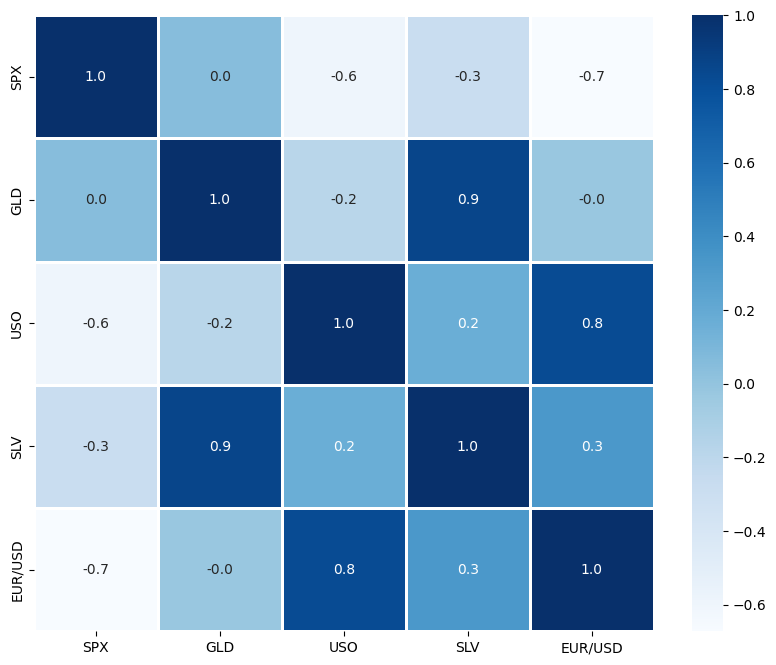

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', lw=1, cbar=True, fmt='.1f')

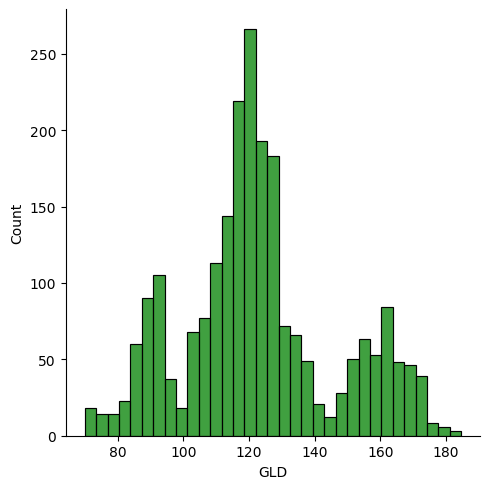

In [8]:
# check the distribution of the GLD price
sns.displot(df['GLD'], color='green')

In [9]:
#splitting the Features and Target
X = df.drop(['Date', 'GLD'], axis=1)
y = df['GLD']

In [10]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [11]:
#splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [12]:
#Model training
#Using Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)

#training the data
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
#Model evaluation
#predict on Test Data
test_data_pred = regressor.predict(X_test)

In [14]:
print(test_data_pred)

[168.54139954  81.66129977 116.17540026 127.45170041 120.76000155
 154.68169812 150.18799892 126.09849976 117.60889874 125.95150109
 116.77450062 171.36040096 141.62379854 167.75889919 115.23709988
 118.05010058 138.60370315 169.82450065 159.65960345 158.59860004
 155.10590003 125.06170008 175.00259898 156.93320436 125.20360056
  93.89409993  78.1384999  120.86880024 119.16169915 167.35990051
  88.34380052 125.11589987  91.22740043 117.72820014 121.07969912
 137.15070198 115.41790141 114.98510099 147.37720069 107.01860094
 104.11450225  87.11219777 126.45070067 117.86999924 154.64429934
 119.67689961 108.40419982 107.95519833  93.13600066 127.04249833
  75.28220016 113.67389962 121.24380016 111.18229922 118.76329878
 120.42619984 158.59099985 168.01150116 147.06489635  85.81279887
  94.40000015  86.82319863  90.63100006 118.89010053 126.45180105
 127.54849971 169.15890022 122.40279946 117.45039907  98.22670047
 167.72140049 142.66899832 131.97280299 121.38990225 120.77379955
 119.56860

In [15]:
#Need to compare predicted values with actual values
#We can use some metrics 
#R squared error
error_score = metrics.r2_score(y_test, test_data_pred)
print(f'R squared error is: {error_score}')

R squared error is: 0.9891289102854018


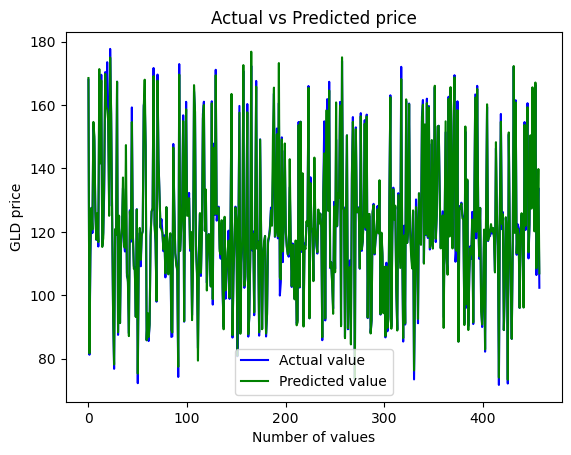

In [16]:
#compare the Actual values and Predicted values in a Plot
#converting y_test into a list cause otherwise it is gonna give us error
y_test = list(y_test)
plt.plot(y_test, color='blue', label = 'Actual value')
plt.plot(test_data_pred, color='green', label = 'Predicted value')
plt.title('Actual vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()